#Real estate price prediction.
Using multiple linear regression and LSTM. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/Real estate.csv")

In [ ]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


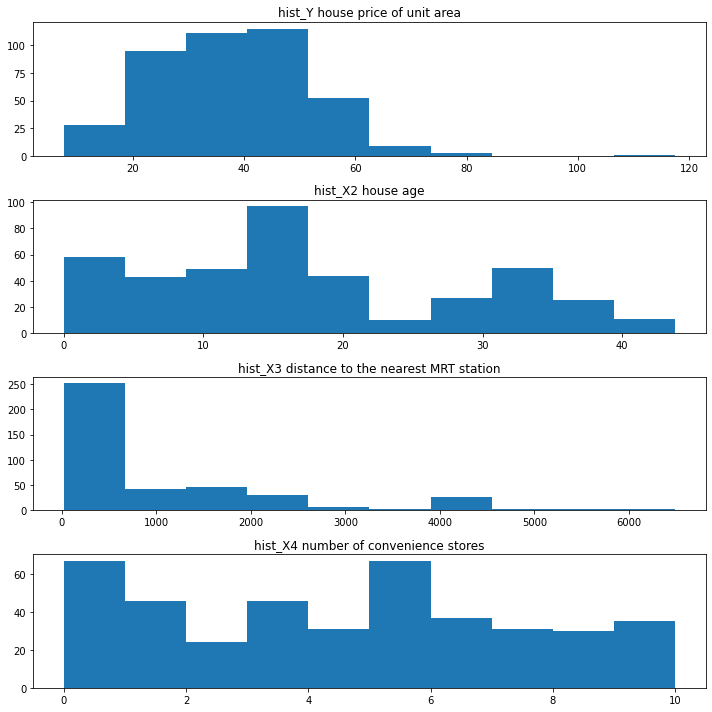

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.hist(df['Y house price of unit area'])
plt.title('hist_Y house price of unit area')

plt.subplot(4, 1, 2)
plt.hist(df['X2 house age'])
plt.title('hist_X2 house age')

plt.subplot(4, 1, 3)
plt.hist(df['X3 distance to the nearest MRT station'])
plt.title('hist_X3 distance to the nearest MRT station')

plt.subplot(4, 1, 4)
plt.hist(df['X4 number of convenience stores'])
plt.title('hist_X4 number of convenience stores')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df.loc[df['X2 house age']<=10, 'X2 house age group'] = 10
df.loc[(df['X2 house age']>10) & (df['X2 house age']<=20), 'X2 house age group'] = 20
df.loc[(df['X2 house age']>20) & (df['X2 house age']<=30), 'X2 house age group'] = 30
df.loc[(df['X2 house age']>30) & (df['X2 house age']<=40), 'X2 house age group'] = 40
df.loc[(df['X2 house age']>40), 'X2 house age group'] = 50

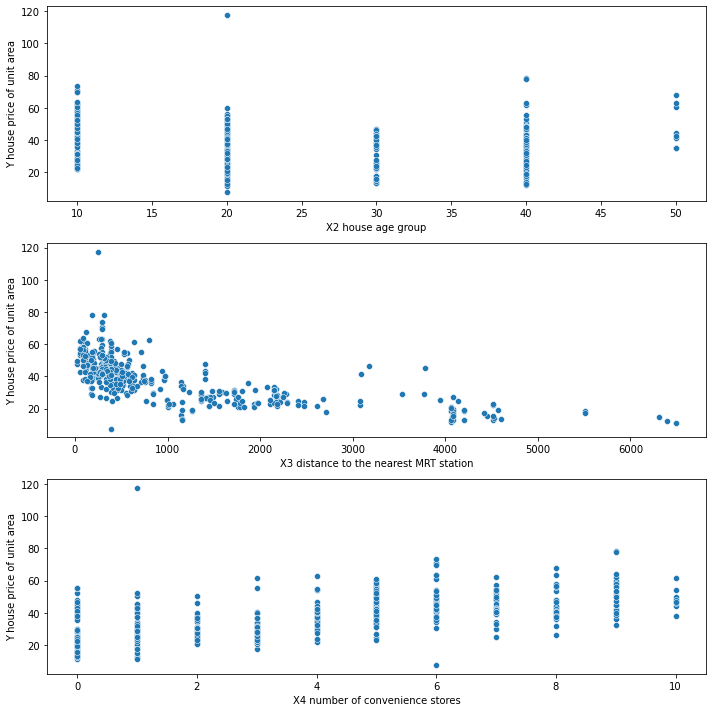

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(x=df['X2 house age group'],y=df['Y house price of unit area'])

plt.subplot(3, 1, 2)
sns.scatterplot(x=df['X3 distance to the nearest MRT station'],y=df['Y house price of unit area'])

plt.subplot(3, 1, 3)
sns.scatterplot(x=df['X4 number of convenience stores'],y=df['Y house price of unit area'])

plt.tight_layout()
plt.show()

In [ ]:
param = [ 'X2 house age group','X3 distance to the nearest MRT station','X4 number of convenience stores','Y house price of unit area']

In [ ]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X2 house age group
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587,-0.042499
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491,-0.004161
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.970125
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,0.011321
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,0.050741
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.039503
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,-0.040689
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,-0.186523
X2 house age group,-0.042499,-0.004161,0.970125,0.011321,0.050741,0.039503,-0.040689,-0.186523,1.000000


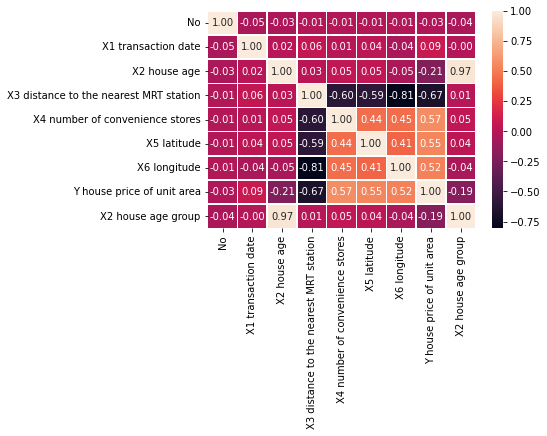

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [ ]:
y=df['Y house price of unit area']
x=df.drop(['Y house price of unit area'], axis=1)

In [ ]:
x.shape

(414, 8)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_train_pred = regr.predict(X_train)

In [ ]:
y_test_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import *
import sklearn.metrics as metrics
import numpy as np

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)

In [ ]:
mae

5.454050426674824

In [ ]:
mse = metrics.mean_squared_error(y_test, y_test_pred)

In [ ]:
mse

46.76798271040292

In [ ]:
rmse = np.sqrt(mse)
rmse

6.838712065177399

In [ ]:
r2 = metrics.r2_score(y_test, y_test_pred)
r2

0.6918822135067323

In [ ]:
df=pd.read_csv("/content/Real estate.csv")

In [ ]:
y=df['Y house price of unit area']
x=df.drop(['Y house price of unit area'], axis=1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
y_test1=y_test1.reset_index(drop=True)
X_test1=X_test1.reset_index(drop=True)

In [ ]:
X_train1 =np.array(X_train1)
X_test1 =np.array(X_test1)
X_train1 = X_train1.reshape(X_train1.shape[0], 1, X_train1.shape[1])
X_test1 = X_test1.reshape(X_test1.shape[0], 1, X_test1.shape[1])

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(331, 1, 7)
(83, 1, 7)
(331,)
(83,)


In [ ]:
#X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=1)
X_val1= X_test1
y_val1 = y_test1

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error

In [ ]:
model = Sequential()
model.add(LSTM(512, input_shape=(1,7), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(512))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 512)            1064960   
                                                                 
 dropout_10 (Dropout)        (None, 1, 512)            0         
                                                                 
 lstm_17 (LSTM)              (None, 1, 256)            787456    
                                                                 
 lstm_18 (LSTM)              (None, 1, 256)            525312    
                                                                 
 lstm_19 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 512)              

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
model_history=model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, batch_size=8, verbose=1, shuffle=False, callbacks=[mc])

Epoch 1/50
41/42 [============================>.] - ETA: 0s - loss: 25.5892 - mse: 986.4773 
Epoch 1: val_loss improved from inf to 10.17230, saving model to best_model.h5
42/42 [==============================] - 11s 100ms/step - loss: 25.4214 - mse: 978.0530 - val_loss: 10.1723 - val_mse: 152.8781
Epoch 2/50
41/42 [============================>.] - ETA: 0s - loss: 11.1062 - mse: 201.7855
Epoch 2: val_loss improved from 10.17230 to 6.75348, saving model to best_model.h5
42/42 [==============================] - 2s 37ms/step - loss: 11.0535 - mse: 200.3370 - val_loss: 6.7535 - val_mse: 79.3053
Epoch 3/50
41/42 [============================>.] - ETA: 0s - loss: 8.1051 - mse: 123.1935
Epoch 3: val_loss improved from 6.75348 to 5.61249, saving model to best_model.h5
42/42 [==============================] - 2s 45ms/step - loss: 8.0882 - mse: 122.4809 - val_loss: 5.6125 - val_mse: 54.5381
Epoch 4/50
41/42 [============================>.] - ETA: 0s - loss: 7.5401 - mse: 115.3673
Epoch 4: val_l

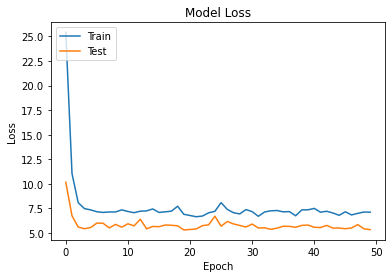

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

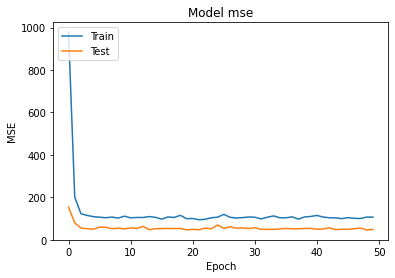

In [ ]:
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
predictions=model.predict(X_test1)

In [ ]:
predictions

array([[24.355127, 23.930878, 24.310102, ..., 23.939524, 24.301329,
        24.008768],
       [46.180122, 45.304985, 46.044838, ..., 45.443848, 46.08148 ,
        45.61603 ],
       [19.99708 , 19.661364, 19.96796 , ..., 19.660124, 19.96116 ,
        19.70366 ],
       ...,
       [39.30314 , 38.56892 , 39.218166, ..., 38.647106, 39.212086,
        38.815742],
       [46.152134, 45.27756 , 46.01718 , ..., 45.41614 , 46.053562,
        45.58844 ],
       [45.76352 , 44.89696 , 45.633198, ..., 45.031563, 45.665886,
        45.205193]], dtype=float32)

In [ ]:
y_test

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
       ... 
322    33.1
119    59.6
245    40.8
146    52.2
360    47.1
Name: Y house price of unit area, Length: 83, dtype: float64

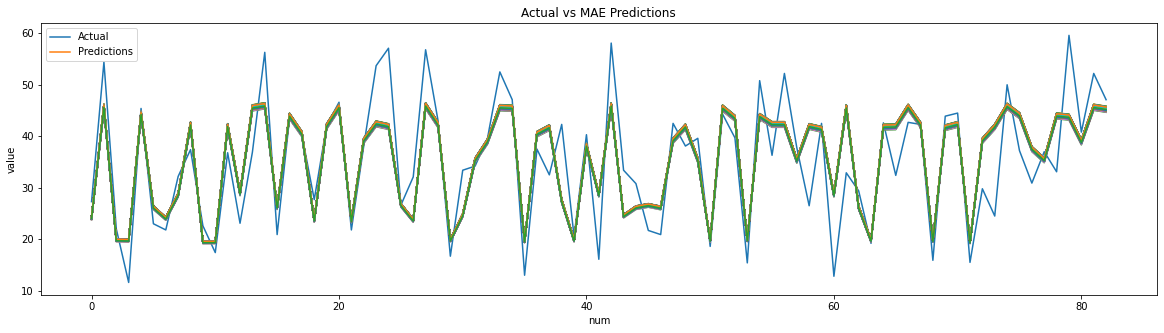

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test1)
plt.plot(predictions)
plt.title("Actual vs MAE Predictions")
plt.xlabel("num")
plt.ylabel("value")
plt.legend(['Actual', 'Predictions'])

In [ ]:
from sklearn.metrics import *
import sklearn.metrics as metrics
import numpy as np



In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
5/5 [==============================] - 2s 117ms/step - loss: 5.2913 - mean_squared_logarithmic_error: 4.3930 - val_loss: 0.8439 - val_mean_squared_logarithmic_error: 0.9572
Epoch 2/100
5/5 [==============================] - 0s 32ms/step - loss: 1.3719 - mean_squared_logarithmic_error: 1.4925 - val_loss: 1.4995 - val_mean_squared_logarithmic_error: 1.6846
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.9364 - mean_squared_logarithmic_error: 0.8088 - val_loss: 0.2377 - val_mean_squared_logarithmic_error: 0.2313
Epoch 4/100
5/5 [==============================] - 0s 30ms/step - loss: 0.2064 - mean_squared_logarithmic_error: 0.2337 - val_loss: 0.2070 - val_mean_squared_logarithmic_error: 0.1556
Epoch 5/100
5/5 [==============================] - 0s 32ms/step - loss: 0.2218 - mean_squared_logarithmic_error: 0.2245 - val_loss: 0.1160 - val_mean_squared_logarithmic_error: 0.0692
Epoch 6/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1377 

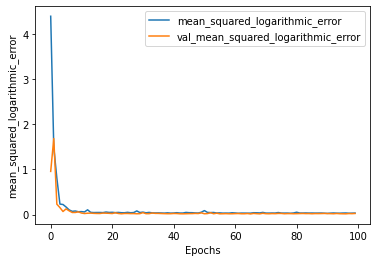

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
X_test['prediction'] = model.predict(x_test_scaled)

In [ ]:
y_test["prediction"] = model.predict(x_test_scaled)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test1)
plt.plot(predictions)
plt.title("Actual vs MAE Predictions")
plt.xlabel("num")
plt.ylabel("value")
plt.legend(['Actual', 'Predictions'])